In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"barnadeepdey","key":"9cb8e1363dfaf7406ccd75991eedb136"}'}

In [ ]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json 

Saving kaggle.json to kaggle (3).json
kaggle.json


In [ ]:
!kaggle competitions download -c titanic

gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train_ok=pd.read_csv('train.csv')
train_ok

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_ok=pd.read_csv('test.csv')
test_ok

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


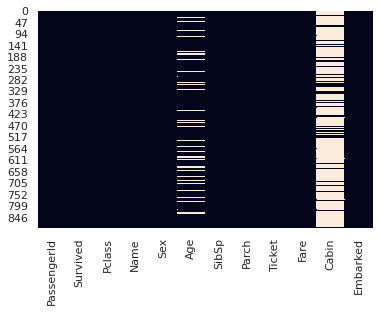

In [ ]:
sns.heatmap(train_ok.isnull(),cbar=False)

In [ ]:
train_ok['Age']=train_ok['Age'].fillna(train_ok['Age'].mean())

train_ok

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [ ]:
test_ok['Age']=test_ok['Age'].fillna(test_ok['Age'].mean())

test_ok

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


This is my first beginning on EDA and its day2 (not actually as I have done a lot of mess on choosing dataset or any project) so I'm uploading to ithub :)


In [ ]:
train_ok['Cabin'].value_counts()
    

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
B30            1
B86            1
A6             1
B102           1
B38            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
train_ok['Cabin']=train_ok['Cabin'].fillna('B57')
train_ok

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B57,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B57,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B57,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B57,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B57,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [ ]:
test_ok['Cabin']=test_ok['Cabin'].fillna('B57')
test_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
categorical=test_ok.loc[:,test_ok.dtypes=='object']
categorical

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,B57,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,B57,S
2,"Myles, Mr. Thomas Francis",male,240276,B57,Q
3,"Wirz, Mr. Albert",male,315154,B57,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,B57,S
...,...,...,...,...,...
413,"Spector, Mr. Woolf",male,A.5. 3236,B57,S
414,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
415,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,B57,S
416,"Ware, Mr. Frederick",male,359309,B57,S


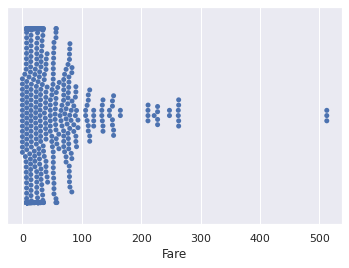

In [ ]:
sns.swarmplot('Fare',data=train_ok)

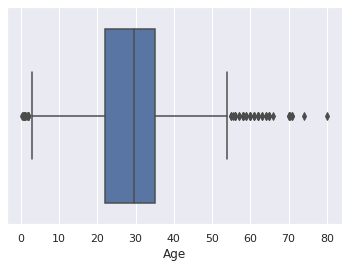

In [ ]:
_=sns.boxplot(train_ok['Age'],data=train_ok)

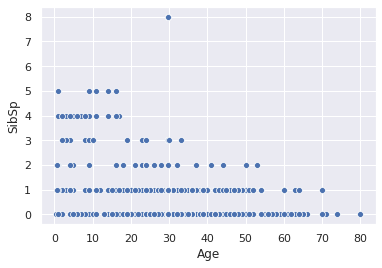

In [ ]:
sns.scatterplot(x='Age',y='SibSp',data=train_ok)

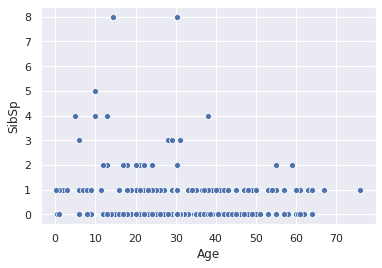

In [ ]:
sns.scatterplot(x='Age',y='SibSp',data=test_ok)

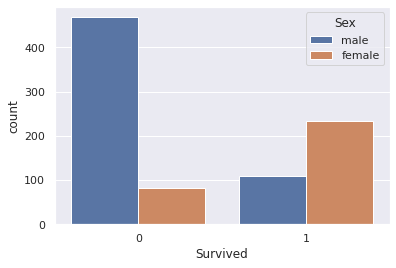

In [ ]:
sns.set(style='darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train_ok)

In [ ]:
train_ok

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B57,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B57,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B57,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B57,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B57,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


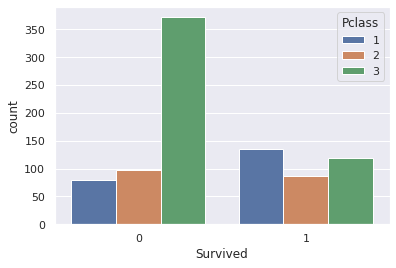

In [ ]:

sns.countplot(x='Survived',hue='Pclass',data=train_ok)

Thus it is been cleared why Rose was forced to the boat,jst to stand high on my bar :3 

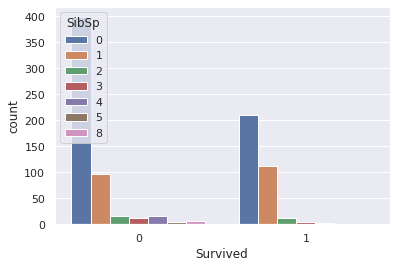

In [ ]:
sns.countplot(x='Survived',hue='SibSp',data=train_ok)

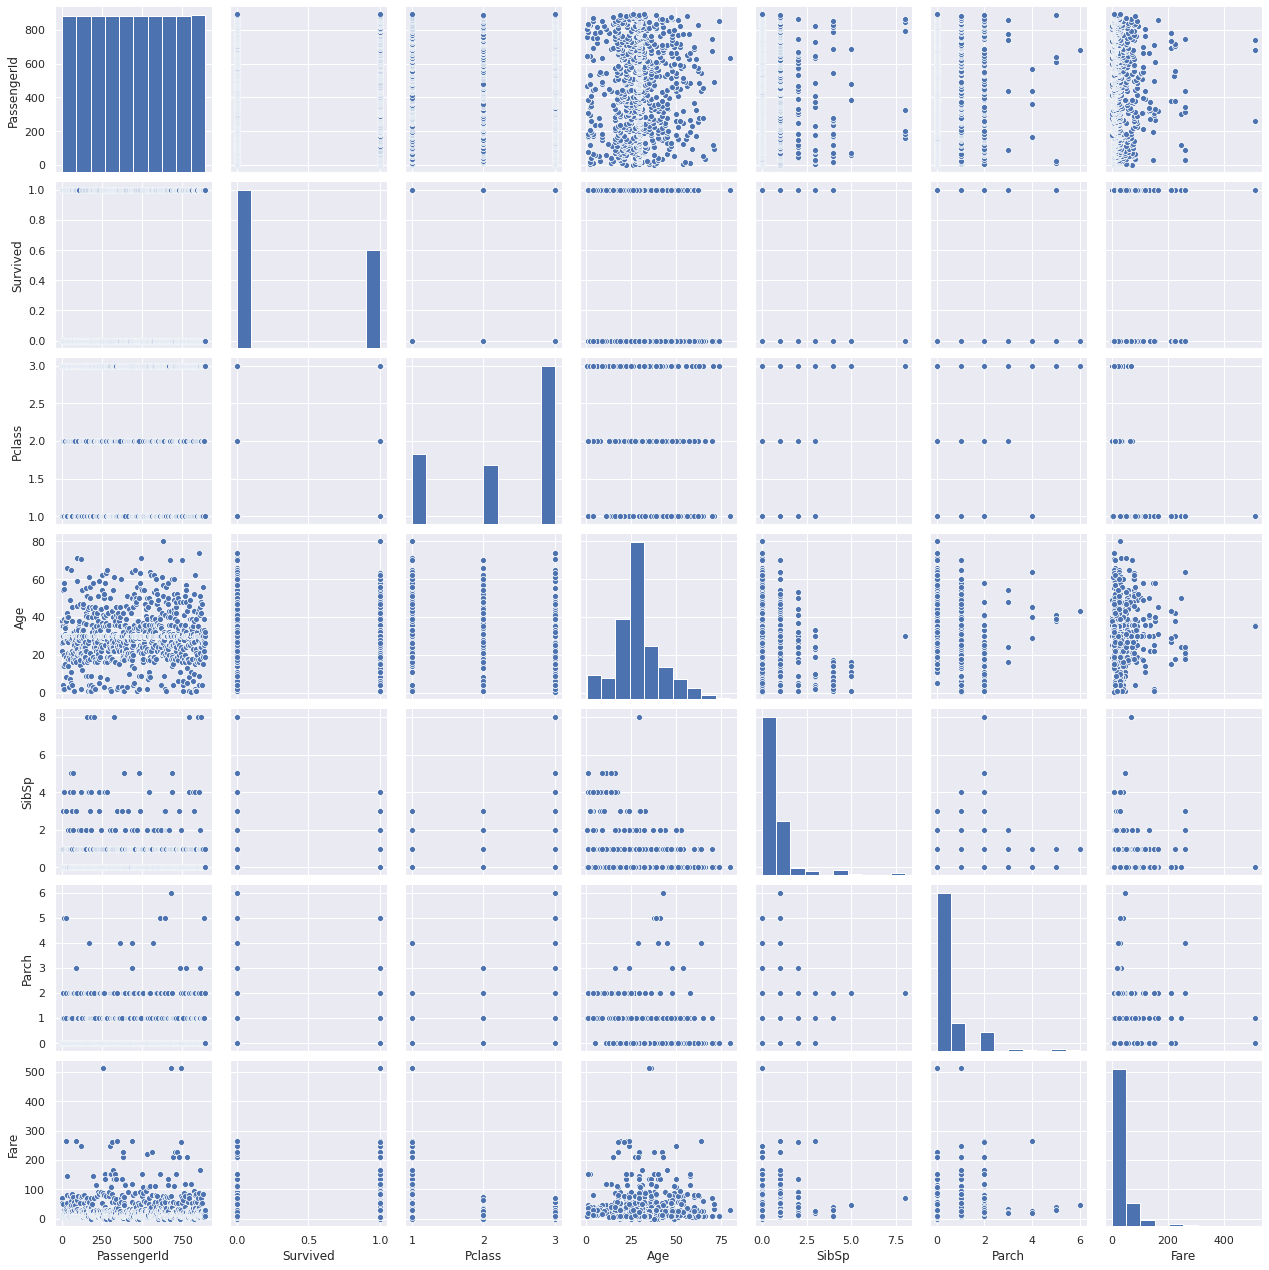

In [ ]:
sns.pairplot(train_ok)

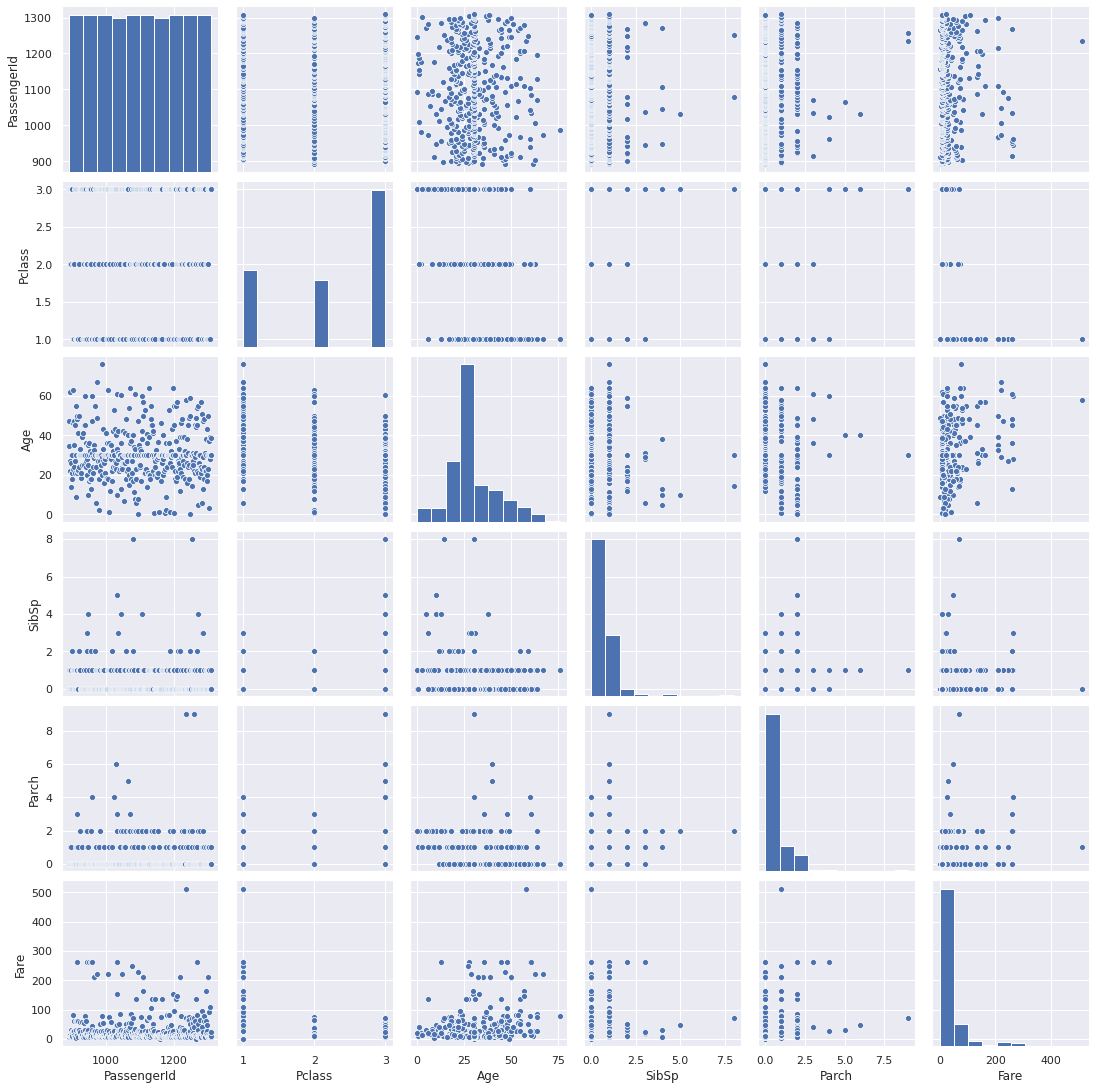

In [ ]:
sns.pairplot(test_ok)

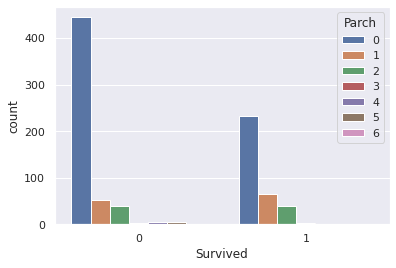

In [ ]:
sns.countplot(x='Survived',hue='Parch',data=train_ok)

In [ ]:
train_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
final2_train=train_ok[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
final2_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
final2_test=test_ok[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
final2_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [ ]:
def processed_fare(final2_train):
  names=['0-10','10-20','20-50','50-100','100-600']
  CatFare=pd.cut(final2_train['Fare'],bins=[0,10,20,50,100,600],labels=names)
  return CatFare

In [ ]:
merge=processed_fare(final2_train)
merge

0        0-10
1      50-100
2        0-10
3      50-100
4        0-10
        ...  
886     10-20
887     20-50
888     20-50
889     20-50
890      0-10
Name: Fare, Length: 891, dtype: category
Categories (5, object): [0-10 < 10-20 < 20-50 < 50-100 < 100-600]

In [ ]:
def processed_fare1(final2_test):
  names2=['0-10','10-20','20-50','50-100','100-600']
  CatFare2=pd.cut(final2_test['Fare'],bins=[0,10,20,50,100,600],labels=names2)
  return CatFare2
merge2=processed_fare1(final2_test)
merge2

0         0-10
1         0-10
2         0-10
3         0-10
4        10-20
        ...   
413       0-10
414    100-600
415       0-10
416       0-10
417      20-50
Name: Fare, Length: 418, dtype: category
Categories (5, object): [0-10 < 10-20 < 20-50 < 50-100 < 100-600]

In [ ]:
def processed_age(final2_train):
  names1=['0-10','10-22','22-30','30-40','40-80']
  Catage=pd.cut(final2_train['Age'],bins=[0,10,22,30,40,80],labels=names1)
  return Catage
merge1=processed_age(final2_train)
merge1

0      10-22
1      30-40
2      22-30
3      30-40
4      30-40
       ...  
886    22-30
887    10-22
888    22-30
889    22-30
890    30-40
Name: Age, Length: 891, dtype: category
Categories (5, object): [0-10 < 10-22 < 22-30 < 30-40 < 40-80]

In [ ]:
def processed_age1(final2_test):
  names3=['0-10','10-22','22-30','30-40','40-80']
  Catage1=pd.cut(final2_test['Age'],bins=[0,10,22,30,40,80],labels=names3)
  return Catage1
merge3=processed_age(final2_test)
merge3

0      30-40
1      40-80
2      40-80
3      22-30
4      10-22
       ...  
413    30-40
414    30-40
415    30-40
416    30-40
417    30-40
Name: Age, Length: 418, dtype: category
Categories (5, object): [0-10 < 10-22 < 22-30 < 30-40 < 40-80]

In [ ]:
sex1=pd.get_dummies(final2_test['Sex'],drop_first=True)
sex1=sex1.astype(int)
embark1=pd.get_dummies(final2_test['Embarked'],drop_first=True)
embark1=embark1.astype(int)
fare2=pd.get_dummies(merge2)
age2=pd.get_dummies(merge3)
final3_test=pd.concat([final2_test,fare2,sex1,embark1,age2],axis=1)
final3_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0-10,10-20,20-50,50-100,100-600,male,Q,S,0-10,10-22,22-30,30-40,40-80
0,3,male,34.50000,0,0,7.8292,Q,1,0,0,0,0,1,1,0,0,0,0,1,0
1,3,female,47.00000,1,0,7.0000,S,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,male,62.00000,0,0,9.6875,Q,1,0,0,0,0,1,1,0,0,0,0,0,1
3,3,male,27.00000,0,0,8.6625,S,1,0,0,0,0,1,0,1,0,0,1,0,0
4,3,female,22.00000,1,1,12.2875,S,0,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,1,0,0,0,0,1,0,1,0,0,0,1,0
414,1,female,39.00000,0,0,108.9000,C,0,0,0,0,1,0,0,0,0,0,0,1,0
415,3,male,38.50000,0,0,7.2500,S,1,0,0,0,0,1,0,1,0,0,0,1,0
416,3,male,30.27259,0,0,8.0500,S,1,0,0,0,0,1,0,1,0,0,0,1,0


In [ ]:
sex=pd.get_dummies(final2_train['Sex'],drop_first=True)
sex=sex.astype(int)
embark=pd.get_dummies(final2_train['Embarked'],drop_first=True)
embark=embark.astype(int)
fare1=pd.get_dummies(merge)
age1=pd.get_dummies(merge1)
final3_train=pd.concat([final2_train,fare1,sex,embark,age1],axis=1)
final3_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0-10,10-20,20-50,50-100,100-600,male,Q,S,0-10,10-22,22-30,30-40,40-80
0,0,3,male,22.000000,1,0,7.2500,S,1,0,0,0,0,1,0,1,0,1,0,0,0
1,1,1,female,38.000000,1,0,71.2833,C,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,3,female,26.000000,0,0,7.9250,S,1,0,0,0,0,0,0,1,0,0,1,0,0
3,1,1,female,35.000000,1,0,53.1000,S,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,3,male,35.000000,0,0,8.0500,S,1,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0,1,0,0,0,1,0,1,0,0,1,0,0
887,1,1,female,19.000000,0,0,30.0000,S,0,0,1,0,0,0,0,1,0,1,0,0,0
888,0,3,female,29.699118,1,2,23.4500,S,0,0,1,0,0,0,0,1,0,0,1,0,0
889,1,1,male,26.000000,0,0,30.0000,C,0,0,1,0,0,1,0,0,0,0,1,0,0


In [ ]:
final4_train=final3_train.drop(['Sex','Fare','Embarked','Age','50-100','10-22'],axis=1)
final4_train

,Survived,Pclass,SibSp,Parch,0-10,10-20,20-50,100-600,male,Q,S,0-10,22-30,30-40,40-80
0,0,3,1,0,1,0,0,0,1,0,1,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,3,0,0,1,0,0,0,0,0,1,0,1,0,0
3,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0,3,0,0,1,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,1,0,1,0,1,0,0
887,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
888,0,3,1,2,0,0,1,0,0,0,1,0,1,0,0
889,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0


In [ ]:
final4_test=final3_test.drop(['Sex','Fare','Embarked','Age','50-100','10-22'],axis=1)
final4_test

,Pclass,SibSp,Parch,0-10,10-20,20-50,100-600,male,Q,S,0-10,22-30,30-40,40-80
0,3,0,0,1,0,0,0,1,1,0,0,0,1,0
1,3,1,0,1,0,0,0,0,0,1,0,0,0,1
2,2,0,0,1,0,0,0,1,1,0,0,0,0,1
3,3,0,0,1,0,0,0,1,0,1,0,1,0,0
4,3,1,1,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,0,0,0,1,0,1,0,0,1,0
414,1,0,0,0,0,0,1,0,0,0,0,0,1,0
415,3,0,0,1,0,0,0,1,0,1,0,0,1,0
416,3,0,0,1,0,0,0,1,0,1,0,0,1,0


types={'S':0,'C':1,'Q':2}
data=[final2_train,final2_test]
for copy in data:
  copy['Embarked']=copy['Embarked'].map(types)

gender={'female':0,'male':1}
data1=[final2_train,final2_test]
for fem in data1:
  fem['Sex']=fem['Sex'].map(gender)

Hey all you who reading it now, please help me label encoding as the two of the above code, gives NaN values to my two columns, So  I have to imort the sklearn.prprocessor module

In [ ]:
finalX_train=final4_train.drop(['Survived'],axis=1)
finaly_train=final4_train['Survived']

In [ ]:
finaly_train.notnull().value_counts()

True    891
Name: Survived, dtype: int64

In [ ]:
from sklearn.svm import SVC

In [ ]:
#grid.best_params_

In [ ]:
svm1=SVC(C=0.1,gamma=1)

In [ ]:
svm1.fit(finalX_train,finaly_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
finaly_test=pd.read_csv('gender_submission.csv')
finaly_test1=finaly_test.drop('PassengerId',axis=1)

In [ ]:
print(svm1.score(final4_test,finaly_test1),svm1.score(finalX_train,finaly_train))


0.7822966507177034 0.7800224466891134


In [ ]:
y_pred=svm1.predict(final4_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
pred=pd.DataFrame(y_pred)
datasets=pd.concat([finaly_test,pred],axis=1)
datasets1=datasets.drop('Survived',axis=1)

In [ ]:
datasets1=datasets1.rename(columns={0:'Survived'})
datasets1.to_csv('Submission1.csv',index=False)

In [ ]:
from google.colab import files
files.download('Submission1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#from sklearn.linear_model import LogisticRegression

In [ ]:
#from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.svm import SVC

In [ ]:
#from sklearn.ensemble import BaggingClassifier

In [ ]:
#from sklearn.metrics import accuracy_score

In [ ]:
#SEED=1
#lr=LogisticRegression()
#dt=DecisionTreeClassifier(min_samples_split=0.15,random_state=SEED)
#svm=SVC()

In [ ]:
#classifiers=[('LogisticRegression',lr),('DecisionTreeClassifier',dt),('SVC',svm)]
#for randm,clf in classifiers:
  #clf.fit(finalX_train,finaly_train)
  #y_pred=clf.predict(final3_test)
  #print('{:s}:{:.3f}').format(randm,accuracy_score(final3_test,y_pred))